In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd

In [41]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [43]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [45]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [48]:
# Collect the names of tables within the database using inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [49]:
# Using the inspector to print the column names and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [50]:
# Using the inspector to print the column names within and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [52]:
# Earliest Date
old_date = session.query(Measurement.date).order_by(Measurement.date).first()

In [53]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date 

('2017-08-23')

In [54]:
# Calculate the date 1 year ago from the last data point in the database
# Date 12 months from the latest date
last_twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_twelve_months

datetime.date(2016, 8, 23)

In [55]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).\
          filter(Measurement.date >= last_twelve_months).\
          order_by(Measurement.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [56]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prec_df = pd.DataFrame(results, columns=['date', 'prcp'])
prec_df.set_index('date', inplace=True, )

prec_df_sorted = prec_df.sort_values('date')
prec_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


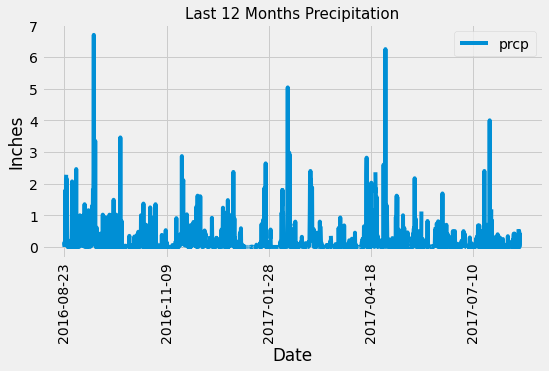

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prec_df.plot(figsize=(8,4), rot = 90)
ax.set_xlabel("Date")
ax.set_ylabel("Inches")
ax.set_title("Last 12 Months Precipitation",fontsize = 15)
plt.savefig("./Image/figure_1.png")
plt.show()

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [59]:
# Design a query to show how many stations are available in this dataset?
sta_count = session.query(Station.station).count()
# sta_count
sta_c = session.query(func.count(Station.station)).all()
sta_c

[(9)]

In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
#Get the id 
active = most_active[0]
act_id = active[0]
act_id

'USC00519281'

In [62]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?       
active_sta = session.query(Measurement.station,func.min(Measurement.tobs),
                           func.max(Measurement.tobs),
                           func.avg(Measurement.tobs)).\
        filter(Measurement.station == act_id).all()
active_sta                           

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.station,Measurement.tobs).\
          filter(Measurement.date >= last_twelve_months).\
          filter(Measurement.station == act_id).all()
temp_obs

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [64]:
# Save the query results as a Pandas DataFrame 
temp_df = pd.DataFrame(temp_obs)
temp_df .set_index('station', inplace=True, )
temp_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


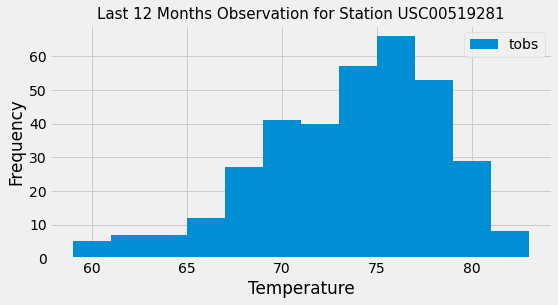

In [65]:
#plot the results as a histogram
#Create bins
temp_df.plot.hist(bins=12, by= 'station',figsize=(8,4))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Last 12 Months Observation for Station USC00519281',fontsize = 15)
plt.savefig("./Image/figure_2.png")
plt.show()

## Bonus Challenge Assignment

In [66]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [67]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date =dt.date(2018, 8, 1) - dt.timedelta(days=365)
end_date =dt.date(2018, 8, 7) - dt.timedelta(days=365)
end_date

datetime.date(2017, 8, 7)

In [68]:
#Create df to plot
trip = calc_temps(start_date, end_date)
trip_df = pd.DataFrame(trip, columns=['min', 'avg','max'])
trip_df

,min,avg,max
0,72.0,79.25,83.0


<function matplotlib.pyplot.show(*args, **kw)>

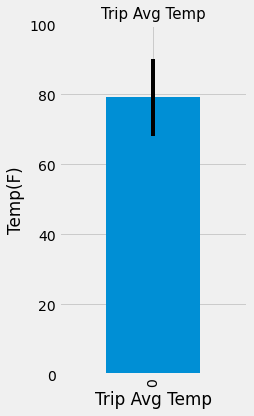

In [69]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y = trip_df['avg']
tmax = trip_df['max']
tmin = trip_df['min']
y.plot.bar( yerr=(tmax-tmin),figsize=(3,6))
plt.xlabel('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp',fontsize = 15)
plt.ylim(0, 100)
plt.savefig("./Image/figure_3.png")
plt.show

In [70]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation, func.sum(Measurement.prcp)).\
             filter(Station.station == Measurement.station).\
             filter(Measurement.date >= start_date).\
             filter(Measurement.date <= end_date).\
             group_by(Measurement.station).\
             order_by(func.sum(Measurement.prcp).desc()).all()


In [71]:
# Historical Rainfall Per Weather Station - Descending order
#   Most Recent Data Search Dates: 
rainfall_df = pd.DataFrame(rainfall, columns=['station' ,'name','latitude','longitude','elevation','prcp'])
rainfall_df

,station,name,latitude,longitude,elevation,prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.36
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.22
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.06
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.04
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00


In [72]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [73]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2018-08-01'
end_date = '2018-08-07'

# Use the start and end date to create a range of dates
date_range = pd.date_range(start_date,end_date)

# Stip off the year and save a list of %m-%d strings
trip_md = date_range.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date

trip_normals = []
for trip in trip_md:
    trip_normals.append(*daily_normals(trip))
    
trip_normals    

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [74]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(trip_normals , columns=['min','avg','max'])
trip_df['Date'] = date_range 

trip_df.set_index('Date', inplace=True,)
trip_df

,min,avg,max
Date,,,
2018-08-01,67.0,75.540000,83.0
2018-08-02,68.0,75.603774,84.0
2018-08-03,70.0,76.611111,85.0
2018-08-04,69.0,76.711538,84.0
2018-08-05,69.0,76.148148,82.0
2018-08-06,67.0,76.250000,83.0
2018-08-07,71.0,77.156863,83.0


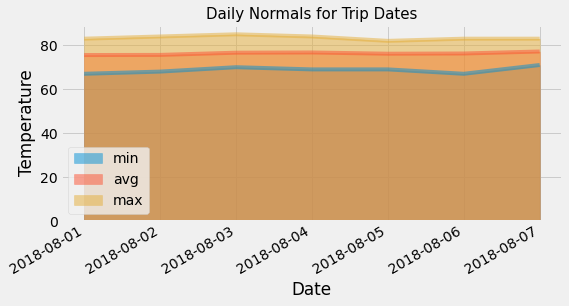

In [77]:
# Plot the daily normals as an area plot with `stacked=False`

trip_df.plot(kind='area',x_compat=True, stacked=False,figsize=(8,4))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Normals for Trip Dates',fontsize = 15)
plt.savefig("./Image/figure_4.png")
plt.show()


In [76]:
# Close the session
session.close()